In [1]:
# We import the modules to use
import cv2, numpy as np, math
from matplotlib import pyplot as plt
from PIL import Image as image
# This allows to display images  and to save  them in cells
%matplotlib inline

In [2]:
def readIm(filename, flagColor=1, show=1):
  # TO BE FILLED BY THE STUDENT
  if(flagColor!=1 and flagColor!=0):
    print("Valor no válido de flagColor, se asignará directamente el valor 1")
    flagColor=1
  img = cv2.cvtColor(cv2.imread(filename,flagColor), cv2.COLOR_BGR2RGB)
  if(show==1):
    if(flagColor==0):
      plt.imshow(img, cmap='gray')
    else:
      plt.imshow(img)
  return img# TO BE FILLED BY THE STUDENT

def rangeDisplay01(im, flag_GLOBAL):
  #check image type (grayscale or color)
  bands = len(im.shape)
  max = np.max(im)
  min = np.min(im)
  dif = max-min
  im2 = np.copy(im)
  if (flag_GLOBAL==True or bands!=3):
  # normalize the grayscale image
  # compute range and apply normalization
    im2 = (im2-min)/dif
  else:
    # normalize each band as a grayscale image 
    for k in range(im2.shape[2]):
      max = np.max(im2[:,:,k])
      min = np.min(im[:,:,k])
      dif = max-min
      for i in range(im2.shape[1]): #columns
          for j in range(im2.shape[2]): #RGB
            im2[i][j][k] = (im2[i][j][k]-min)/dif
  return im2

def displayIm(im, title='Result',factor= 1, showFlag=True):  
  # Normalize range
  im2 = np.copy(im)
  im2 = np.asarray(im2,float)
  im2 = rangeDisplay01(im2,True)
  # Display the image
  if len(im2.shape) == 3:
    # im has three channels
    plt.imshow(im2)
  else:
    # im has a single channel
    plt.imshow(im2,cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

def displayMI_ES(vim, title="",factor=1):
  maxlinea=6
  size = len(vim)
  if size<=maxlinea:
    out = np.hstack(vim)
    out = np.asarray(out,float)
  else:
    times = round(size/maxlinea)
    rest = size%maxlinea
    if (rest>=maxlinea/2):
      times = times - 1
    aux = []
    for i in range(times):
      auxvim = []
      for j in range(maxlinea):
        auxvim.append(vim[i*maxlinea+j])
      aux.append(np.hstack(auxvim))
    if(rest!=0):
      #We have to add black figures to match the size of the rest of the arrays
      blackimage = np.full((len(vim[0]),len(vim[0][0]),3),[0,0,0])
      auxvim = []
      for i in range(rest):
        auxvim.append(vim[times*maxlinea+i])
      for i in range(maxlinea-rest):
        auxvim.append(blackimage)
      aux.append(np.hstack(auxvim))
    out = np.vstack(aux)
    out = np.asarray(out,float)
  return displayIm(out,title,factor)



In [3]:
def buildFriso(im, type):
  if(type=='p1'):
    im2 = []
    for i in range(6):
      im2.append(im)
    displayMI_ES(im2, 'p1',2)
  elif(type=='p2'):
    im2 = cv2.rotate(im,cv2.ROTATE_180)
    im3 = []
    for i in range(3):
      im3.append(im)
      im3.append(im2)
    displayMI_ES(im3, 'p2',2)
  elif(type=='p1m1'):
    im2 = cv2.flip(im, 1)     #1=reflixión con recta vertical, 0 = reflexión con recta horizontal
    im3 = []
    for i in range(3):
      im3.append(im)
      im3.append(im2)
    displayMI_ES(im3, 'p1m1',2)
  elif(type=='p2mm'):
    im2 = cv2.flip(im,0)
    im3 = np.concatenate((im,im2), axis=0)  #Pegar 2 imágenes verticalmente
    im4 = np.flip(im3,1)
    im5 = []
    for i in range(3):
      im5.append(im3)
      im5.append(im4)
    displayMI_ES(im5, 'p2mm',2)
  elif(type=='p11m'):
    im2 = cv2.flip(im,0)
    im3 = np.concatenate((im,im2), axis=0)
    im4 = []
    for i in range(6):
      im4.append(im3)
    displayMI_ES(im4, 'p11m',2)
  elif(type=='p11g'):
    im2 = cv2.flip(im,0)
    firsthalf = im2[:,0:int(im2.shape[1]/2)]
    secondhalf = im2[:,int(im2.shape[1]/2):int(im2.shape[1])]
    im3 = np.concatenate((secondhalf,firsthalf), axis=1)    #Pegar 2 imágenes horizontalmente
    im4 = np.concatenate((im,im3), axis=0)
    im5 = []
    for i in range(6):
      im5.append(im4)
    displayMI_ES(im5, 'p11g',2)
  elif(type=='pcm'):
    im2 = cv2.flip(im,1)
    im3 = np.concatenate((im,im2), axis=1)
    im4 = cv2.rotate(im3, cv2.ROTATE_180)
    im5 = []
    for i in range(2):
      im5.append(im3)
      im5.append(im4)
    displayMI_ES(im5, 'pcm', 2)
  else:
    displayMI_ES(im, 'original')

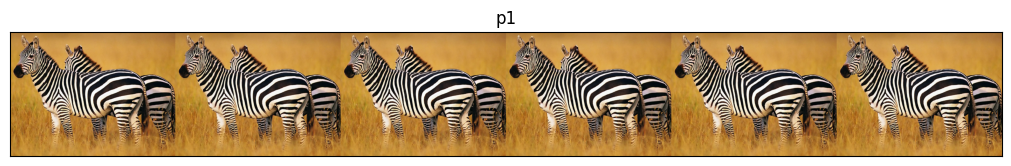

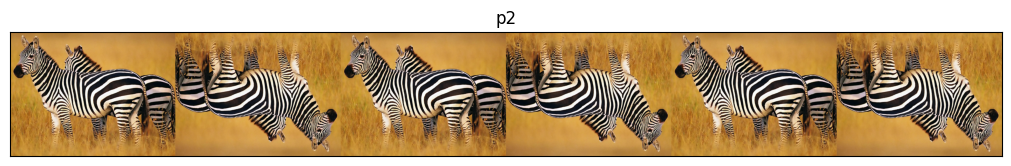

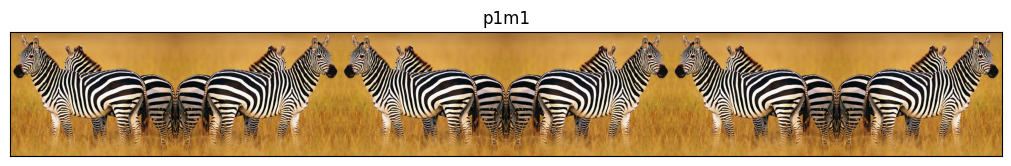

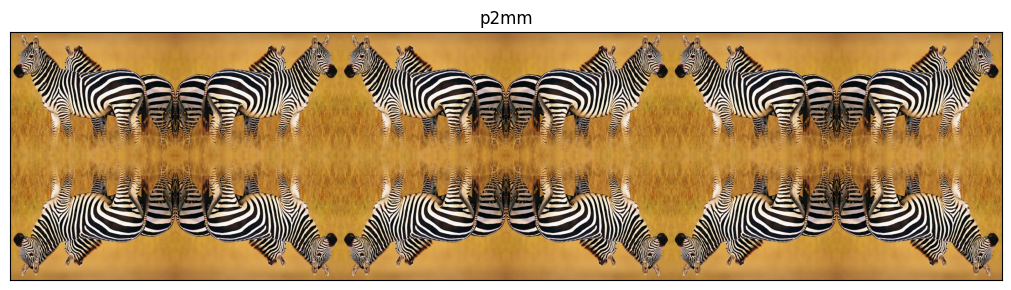

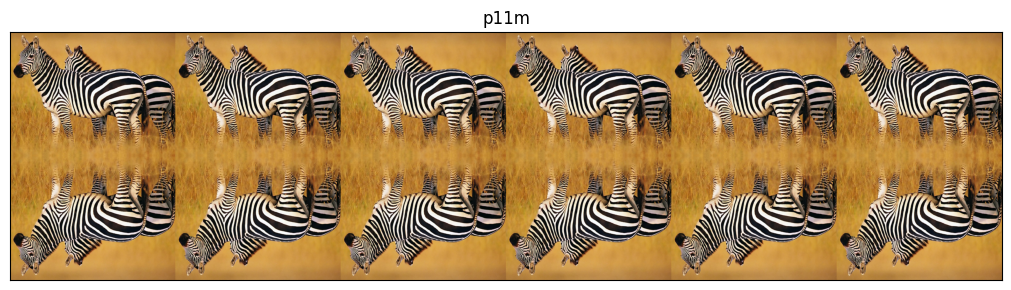

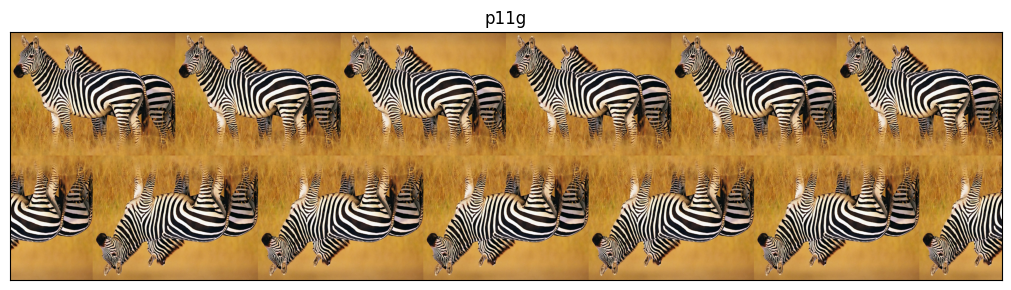

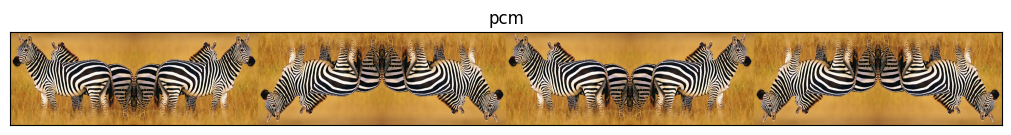

In [4]:
im = readIm("./img/zebra.jpg", 1) # 1= a color ;  0 = blanco y negro
buildFriso(im, 'p1')
buildFriso(im, 'p2')
buildFriso(im, 'p1m1')
buildFriso(im, 'p2mm')
buildFriso(im, 'p11m')
buildFriso(im, 'p11g')
buildFriso(im, 'pcm')
